In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline

In [83]:
import numpy as np
import json
# transition matrix for 100 patterns
with open('markov_3_3.json', 'r') as f:
    A =np.array(json.load(f))
print "actual transition matrix = \n",data
# making a symmetric matrix
data=np.maximum( A, A.transpose() )
# inverting each element for considering distance
data=np.reciprocal(data)
# clipping infinite distance
np.clip(data,0,999,out=data)
# filling diagonals with 0
np.fill_diagonal(data,0)
print "--------------------------------------------------------------------------------"
print "processed distance matrix = \n",data
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(data) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
print "--------------------------------------------------------------------------------"
print "distance array is = ",distArray

actual transition matrix = 
[[   0.         1.16667    6.      ...,  999.       999.       999.     ]
 [   1.16667    0.       999.      ...,  999.       999.       999.     ]
 [   6.       999.         0.      ...,  999.       999.       999.     ]
 ..., 
 [ 999.       999.       999.      ...,    0.       999.       999.     ]
 [ 999.       999.       999.      ...,  999.         0.       999.     ]
 [ 999.       999.       999.      ...,  999.       999.         0.     ]]
--------------------------------------------------------------------------------
processed distance matrix = 
[[   0.         1.16667    6.      ...,  999.       999.       999.     ]
 [   1.16667    0.       999.      ...,  999.       999.       999.     ]
 [   6.       999.         0.      ...,  999.       999.       999.     ]
 ..., 
 [ 999.       999.       999.      ...,    0.       999.       999.     ]
 [ 999.       999.       999.      ...,  999.         0.       999.     ]
 [ 999.       999.       999.    

/home/alibaba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in reciprocal


In [84]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [88]:
# generate the linkage matrix
Z = linkage(distArray, 'ward')
Z.shape

(99, 4)

In [93]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [98]:
# set cut-off to 50
max_d = 100  # max_d as in max_distance

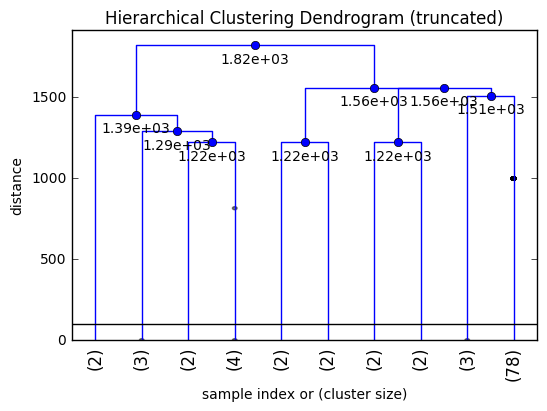

In [99]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()